## Tools

In [6]:
%pip install tensorflow[and-cuda]

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np # math library
import pandas as pd # dataframe library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # graphing library that builds ontop of mathplot
import tensorflow as tf # machine learning library
from tensorflow import keras # computer vision library from tensorflow 
import math
sns.set_style("darkgrid")

## Dataset
*Note: This is using a 5 class subset. The subset bird species are RUFOUS TREPE, HOUSE FINCH, D-ARNAUDS BARBET, OVENBIRD, ASIAN GREEN BEE EATER.
These 5 were choosen because they had the most available data out of the 500+ species in the orginial dataset.*

In [8]:
# training subset = RUFOUS TREPE, HOUSE FINCH, D-ARNAUDS BARBET, OVENBIRD, ASIAN GREEN BEE EATER
#csv format: class id,filepaths(relative),labels,data set(e.g. training,valid or test),scientific name
data = pd.read_csv("birds.csv")
data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


# Computer Vision
Convert an image to 3 histograms, one for each color channel. 
The histogram is condensed by default by a factor of 8 to reduce computation time(i.e. similar colors are grouped together).


factor: 8


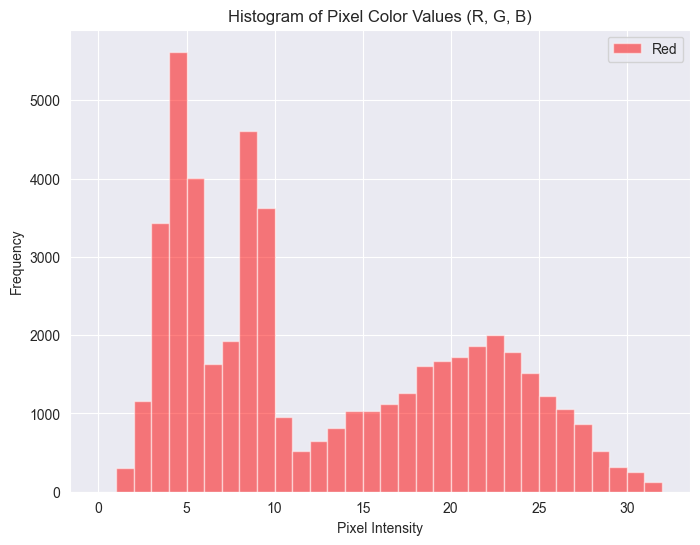

In [23]:
def image_to_histograms(filepath,factor=8):
    # dynamically determine color bins based on factor which determines how many colors are being grouped together
    nbins = math.ceil(255 / factor)

    # load image into computer vision using native image size(this data set has an universal image size)
    image = tf.keras.utils.load_img(filepath)
    # the image is 224x224x3 (width x height x color_channels)
    image_array = tf.keras.utils.img_to_array(image,data_format='channels_last')
    
    print('factor: ' + str(factor))
    # group pixel colors into bins
    bin_array = image_array // factor
    # 3D Slice colstart:colstop, rowstart:rowstop, depthstart:depthstop
    # Splitting the image_array into R, G, B channels
    red_channel = bin_array[:, :, 0]
    green_channel = bin_array[:, :, 1]
    blue_channel = bin_array[:, :, 2]

    # Create histograms data strucutre for each channel group (255 // 8 = 32)
    # x_hist = array, x_bins = bins start indexes in said array
    # note, since each color group has it's own bin, each index i corresponds to bin i making x_bins variable redundant.
    red_hist, _ = np.histogram(red_channel, bins=nbins, range=(0, nbins))
    green_hist, _ = np.histogram(green_channel, bins=nbins, range=(0, nbins))
    blue_hist, _ = np.histogram(blue_channel, bins=nbins, range=(0, nbins))
    return [red_hist,green_hist,blue_hist]

#TODO: Remove this testing line!
histo_tuple = image_to_histograms('train/ASIAN GREEN BEE EATER/162.jpg',32)

# Preprocessing & Caching
Run through the images and write their histogram to disk.
Add/update spreadsheet column with index that points to the image's histograms that are stored on disk.
This will make the data easier to access later.

In [7]:
#TODO: Read the above markdown, a bunch to do here.
for index, row in data.iterrows():
    # read data set column of the given row
    dataset = row['data set']
    # read filepath col of the given row
    filepath = row['filepaths']
    print("filepath: " +filepath)
    break
    BINS = 32
    image_to_histograms(filepath,BINS)
    break

filepath: train/ASIAN GREEN BEE EATER/162.jpg


## Basic Exploratory Data Analysis (EDA)
It is a logical assumption that pixels are independent of each other, one pixel being red has no bearing on it's neighbor. To save computation I have forgone the heat map as as a result. Seaborn requires the raw data for accurate graphing, so the pre-processing and caching does not come into play here.

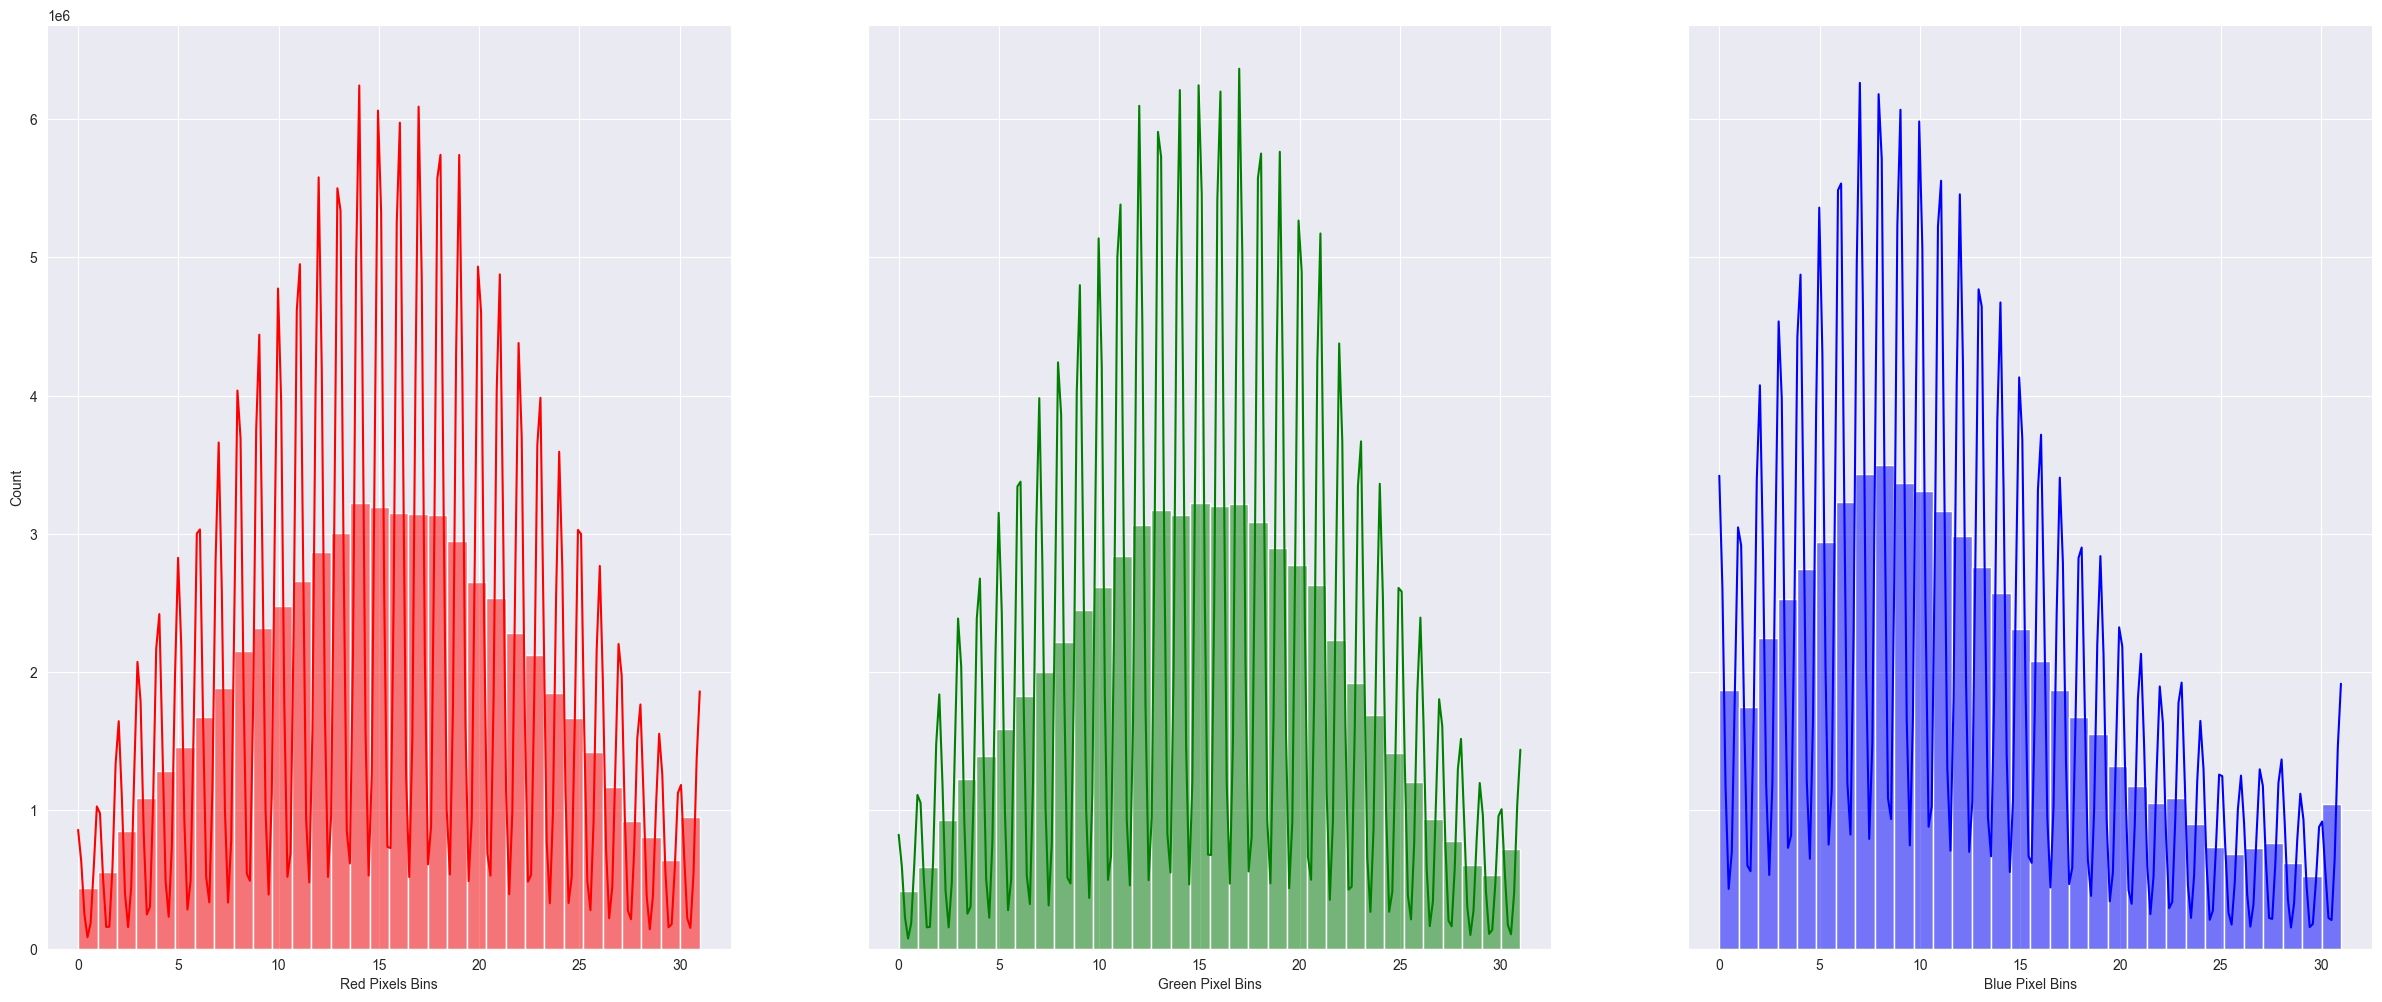

In [31]:
# using functions to limit scope of variables to make debugging easier and data overhead lesser.
# seaborn requires the raw data(may combine caching to be part of this function later)
def EDA(data,factor=8):
    nbins = math.ceil(255 / factor)
    red_channel_image_data_list = []
    green_channel_image_data_list = []
    blue_channel_image_data_list = []
    for index, row in data.iterrows():
        # read data set column of the given row
        dataset = row['data set']

        # read filepath col of the given row
        filepath = row['filepaths']
        # read label
        label = row['labels']
        # load image into computer vision using native image size(this data set has an universal image size)
        image = tf.keras.utils.load_img(filepath)
        # the image is 224x224x3 (width x height x color_channels)
        image_array = tf.keras.utils.img_to_array(image,data_format='channels_last')
        
        # group similar colors together to reduce computation time based on a constant value that can be adjusted
        image_array = image_array // factor # Reduce from 255x255x255 to 32x32x32, easier computation
        
        # 3D Slice colstart:colstop, rowstart:rowstop, depthstart:depthstop
        # Splitting the image_array into R, G, B channels
        red_channel = image_array[:, :, 0]
        green_channel = image_array[:, :, 1]
        blue_channel = image_array[:, :, 2]
        # gather raw and format data for seaborn plotting
        red_channel_image_data_list.append(red_channel)
        green_channel_image_data_list.append(green_channel)
        blue_channel_image_data_list.append(blue_channel)

        
    all_red_pixel_values = np.concatenate([image.ravel() for image in red_channel_image_data_list])
    all_green_pixel_values = np.concatenate([image.ravel() for image in green_channel_image_data_list])
    all_blue_pixel_values = np.concatenate([image.ravel() for image in blue_channel_image_data_list])    
    # Plots the smooth line
    # TODO: Reduce plot height
    fig, axes = plt.subplots(1, 3,figsize=(30,12), sharey=True)
    sns.histplot(all_red_pixel_values, ax=axes[0],bins=nbins, kde=True, color='red')
    sns.histplot(all_green_pixel_values,ax=axes[1], bins=nbins, kde=True, color='green')
    sns.histplot(all_blue_pixel_values, ax=axes[2],bins=nbins, kde=True, color='blue')

    # Setting x-axis labels for each subplot
    axes[0].set_xlabel('Red Pixels Bins')
    axes[1].set_xlabel('Green Pixel Bins')
    axes[2].set_xlabel('Blue Pixel Bins')
EDA(data)

# EDA Results
Putting color ranges into bins has had a negative effect on the smoothness of distrubtion line, but deemed nessary due to computational time otherwise.
Looking at the histograms, espically the blue pixel bins there is some deviation from the normal distrubtion.

## Calculate Prior
P(Y=y) where y is a given bird species. In this case it's the  (amount of samples = y / total smaples).
Calculate priors for all possible Y's.

In this case it's the amount of times the bird appears in the trainning set / total trainning set samples

In [ ]:
def calculatePrior(df,allY):
     classes = sorted(list(df[allY].unique())) # find all Y labels
     prior = []
     for i in classes: # for possible label
         prior.append(len(df[data[allY]==i])/len(df)) # Y=y samples / total samples
     return prior

## Calculate P(X=x|Y=y) categorically
Given the discrete nature of the data guasian bayes is inapporiate.

In [ ]:
# feat_name should be replaced by whatever index system I am using to access the bins
# Passing in feature value is odd in my case, I will already have all the values processed
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label] # take Y=y data points.
    # Need to add histogram logic here. P(X|Y) = X=x Pixels in bin / total X pixels in bin for Y.(Running sum).
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y)
 for all y and find the maximum

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculatePrior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique())) # find all labels
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

Placeholder for now. Seems like sklearn.metrics is what we are meant to be use. Which means sklearn integration somewhat.

In [ ]:
#from sklearn.model_selection import train_test_split # not useful to me since we got a pre-divide dataset
#train, test = train_test_split(data, test_size=.2, random_state=41) # see above comment

#X_test = test.iloc[:,:-1].values # test features
#Y_test = test.iloc[:,-1].values # test labels
masterlist = 0 # X_test should be the masterlist
target_labels = ['HOUSE FINCH','RUFOUS TREPE','D-ARNAUDS BARBET','OVENBIRD','ASIAN GREEN BEE EATER']
Y_pred = naive_bayes_categorical(data, X=masterlist, Y=target_labels) # these and below are the of interest parts for my purposes.

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))